import and pip necessary libraries

In [1]:
import pandas as pd 
import time
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

Read Data

In [2]:
df = pd.read_csv("ratings_Electronics.csv", names=["userId", "productId", "rating", "timestamp"])  
df.head() 

,userId,productId,rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [3]:
# Display dataset information and basic statistics
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     object 
 1   productId  object 
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB
None
             rating     timestamp
count  7.824482e+06  7.824482e+06
mean   4.012337e+00  1.338178e+09
std    1.380910e+00  6.900426e+07
min    1.000000e+00  9.127296e+08
25%    3.000000e+00  1.315354e+09
50%    5.000000e+00  1.361059e+09
75%    5.000000e+00  1.386115e+09
max    5.000000e+00  1.406074e+09


Data Preprocess

In [4]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Check for duplicate rows
print("Duplicate rows:\n", df.duplicated().sum())

Missing values:
 userId       0
productId    0
rating       0
timestamp    0
dtype: int64
Duplicate rows:
 0


In [5]:
# Drop duplicate rows, if any
df = df.drop_duplicates()

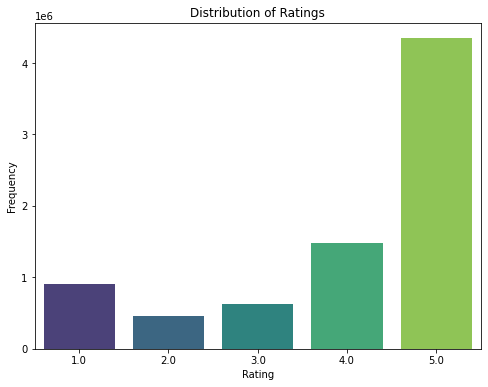

In [6]:
# Explore the distribution of ratings
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='rating', palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

Data Filter

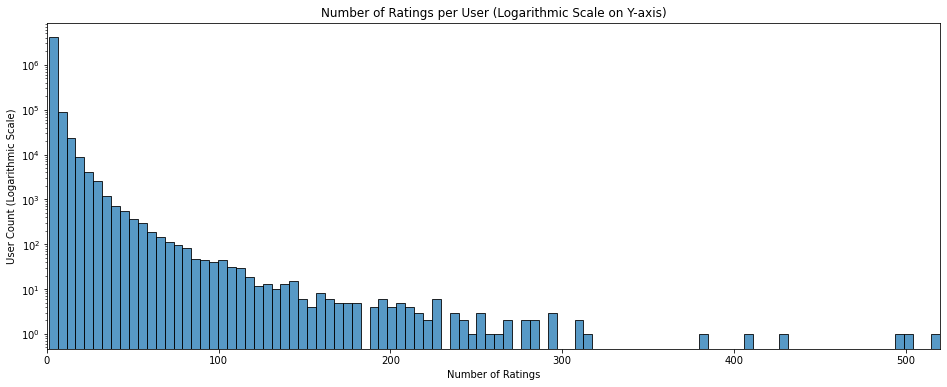

In [7]:
# Explore the number of ratings per user
user_ratings_count = df['userId'].value_counts()
plt.figure(figsize=(16, 6))
sns.histplot(user_ratings_count, kde=False, bins=100, log_scale=(False, True))
plt.title('Number of Ratings per User (Logarithmic Scale on Y-axis)')
plt.xlabel('Number of Ratings')
plt.ylabel('User Count (Logarithmic Scale)')
plt.xlim(0, user_ratings_count.max())
plt.show()

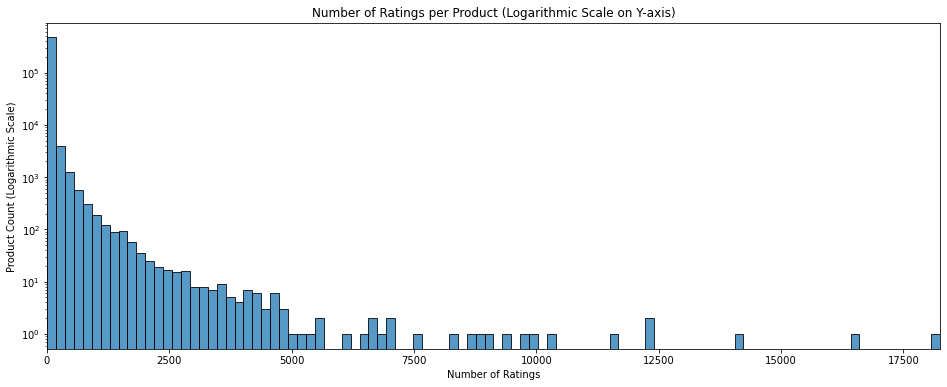

In [8]:
# Explore the number of ratings per product
product_ratings_count = df['productId'].value_counts()
plt.figure(figsize=(16, 6))
sns.histplot(product_ratings_count, kde=False, bins=100, log_scale=(False, True))
plt.title('Number of Ratings per Product (Logarithmic Scale on Y-axis)')
plt.xlabel('Number of Ratings')
plt.ylabel('Product Count (Logarithmic Scale)')
plt.xlim(0, product_ratings_count.max())
plt.show()

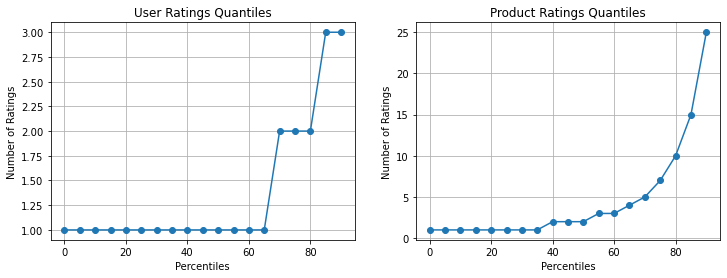

In [9]:
# Calculate the quantiles for users and products at different percentiles
percentiles = np.arange(0, 95, 5)
user_quantiles = [user_ratings_count.quantile(p / 100) for p in percentiles]
product_quantiles = [product_ratings_count.quantile(p / 100) for p in percentiles]

# Plot the quantiles for users and products
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.plot(percentiles, user_quantiles, marker='o', linestyle='-')
ax1.set_title('User Ratings Quantiles')
ax1.set_xlabel('Percentiles')
ax1.set_ylabel('Number of Ratings')
ax1.grid()

ax2.plot(percentiles, product_quantiles, marker='o', linestyle='-')
ax2.set_title('Product Ratings Quantiles')
ax2.set_xlabel('Percentiles')
ax2.set_ylabel('Number of Ratings')
ax2.grid()

plt.show()

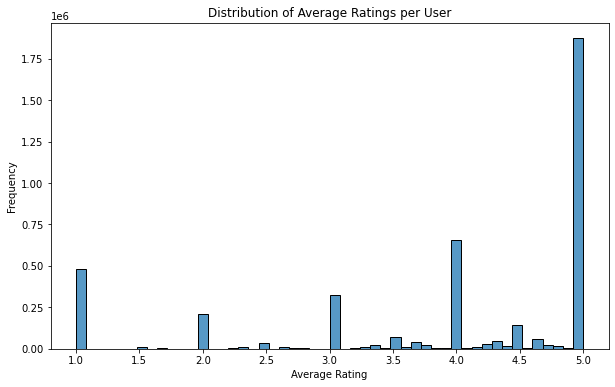

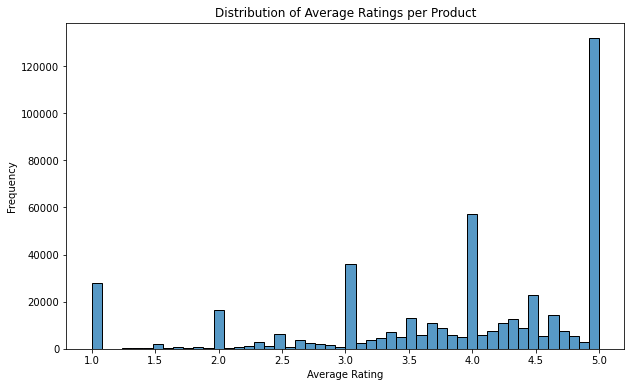

In [10]:
product_rating_agg = df.groupby('productId')['rating'].agg(['mean', 'count']).reset_index()

user_rating_agg = df.groupby('userId')['rating'].agg(['mean', 'count']).reset_index()

plt.figure(figsize=(10, 6))
sns.histplot(user_rating_agg['mean'], bins=50, kde=False)
plt.title('Distribution of Average Ratings per User')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(product_rating_agg['mean'], bins=50, kde=False)
plt.title('Distribution of Average Ratings per Product')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()

In [11]:
# Filter users and products with a minimum number of ratings
# we set min user ratings as 20 and min product ratings as 10
min_user_ratings = 5
min_product_ratings = 10

filtered_users = user_ratings_count[user_ratings_count >= min_user_ratings].index
filtered_products = product_ratings_count[product_ratings_count >= min_product_ratings].index

filtered_data = df[(df['userId'].isin(filtered_users)) & (df['productId'].isin(filtered_products))]

# Print the shape of the original and filtered data
print(f"Original data shape: {df.shape}")
print(f"Filtered data shape: {filtered_data.shape}")

Original data shape: (7824482, 4)
Filtered data shape: (1991560, 4)


EDA

In [12]:
# basic data information
print("Data shape:", filtered_data.shape)
print("\nData types:\n", filtered_data.dtypes)
print("\nMissing values:\n", filtered_data.isnull().sum())

Data shape: (1991560, 4)

Data types:
 userId        object
productId     object
rating       float64
timestamp      int64
dtype: object

Missing values:
 userId       0
productId    0
rating       0
timestamp    0
dtype: int64


In [13]:
# data statistics information
print("\nSummary statistics for numerical features:\n", filtered_data.describe())

print("\nFrequency distribution for categorical features:")
for col in filtered_data.select_dtypes(include=['object']):
    print(f"\n{col}:\n{filtered_data[col].value_counts()}")


Summary statistics for numerical features:
              rating     timestamp
count  1.991560e+06  1.991560e+06
mean   4.201605e+00  1.339592e+09
std    1.205818e+00  6.520485e+07
min    1.000000e+00  9.292320e+08
25%    4.000000e+00  1.316909e+09
50%    5.000000e+00  1.360714e+09
75%    5.000000e+00  1.385078e+09
max    5.000000e+00  1.406074e+09

Frequency distribution for categorical features:

userId:
ADLVFFE4VBT8      439
A3OXHLG6DIBRW8    423
A5JLAU2ARJ0BO     410
A6FIAB28IS79      390
A680RUE1FDO8B     356
                 ... 
AY14HVG8HE5EF       1
A2K14ULK1QZW1K      1
A1GUT6TIUSW48G      1
A4R2FRH4HSWF        1
AWNJIJYMN0NJ1       1
Name: userId, Length: 253895, dtype: int64

productId:
B007WTAJTO    5483
B003ES5ZUU    4480
B00DR0PDNE    4283
B0019EHU8G    3836
B002WE6D44    3107
              ... 
B00HD32FWI       1
B00ESQ424W       1
B002MCTZZU       1
B00E7NG5M8       1
B007GRXXD6       1
Name: productId, Length: 95177, dtype: int64


In [14]:
# check unique values
print(f"Number of unique users: {filtered_data['userId'].nunique()}")
print(f"Number of unique products: {filtered_data['productId'].nunique()}")

Number of unique users: 253895
Number of unique products: 95177


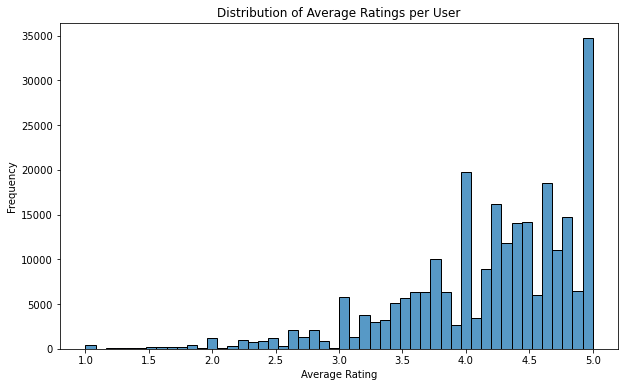

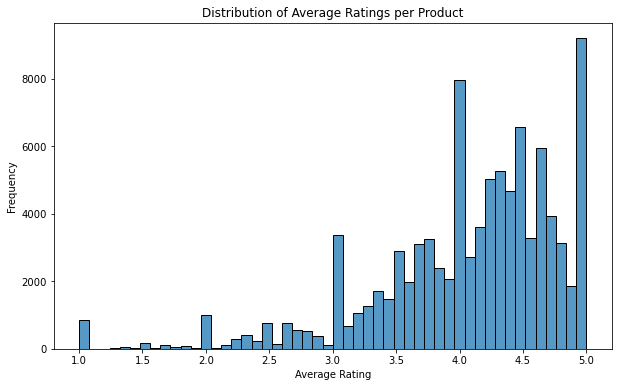

In [15]:
product_rating_agg = filtered_data.groupby('productId')['rating'].agg(['mean', 'count']).reset_index()

user_rating_agg = filtered_data.groupby('userId')['rating'].agg(['mean', 'count']).reset_index()

plt.figure(figsize=(10, 6))
sns.histplot(user_rating_agg['mean'], bins=50, kde=False)
plt.title('Distribution of Average Ratings per User')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(product_rating_agg['mean'], bins=50, kde=False)
plt.title('Distribution of Average Ratings per Product')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()

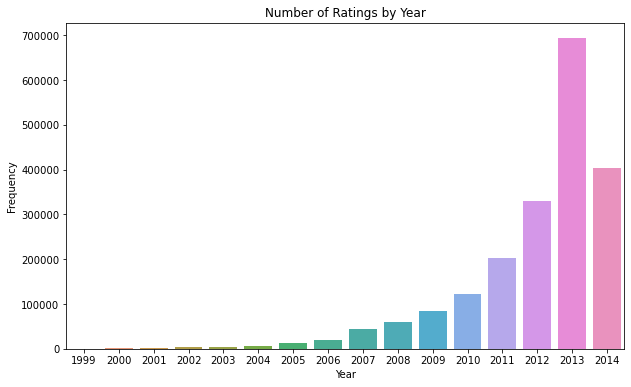

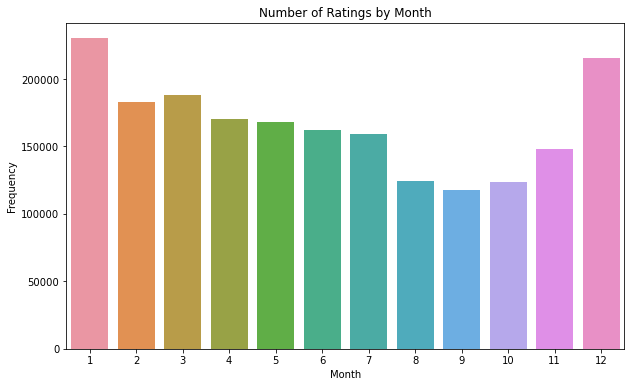

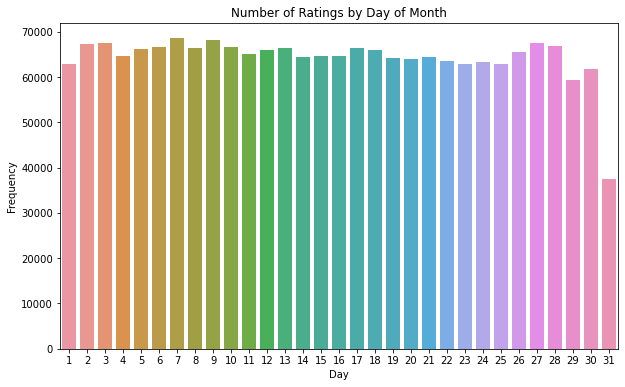

In [16]:
data_with_datetime = filtered_data.copy()

# Convert the 'timestamp' column to a datetime object
data_with_datetime['datetime'] = data_with_datetime['timestamp'].apply(lambda x: datetime.fromtimestamp(x))

# Extract year, month, day, and hour information
data_with_datetime['year'] = data_with_datetime['datetime'].dt.year
data_with_datetime['month'] = data_with_datetime['datetime'].dt.month
data_with_datetime['day'] = data_with_datetime['datetime'].dt.day



# Visualize the distribution of ratings by year, month, day, and hour
plt.figure(figsize=(10, 6))
sns.countplot(x='year', data=data_with_datetime)
plt.title('Number of Ratings by Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='month', data=data_with_datetime)
plt.title('Number of Ratings by Month')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='day', data=data_with_datetime)
plt.title('Number of Ratings by Day of Month')
plt.xlabel('Day')
plt.ylabel('Frequency')
plt.show()

Download the processed dataset

In [17]:
# Save the DataFrame to a CSV file
csv_file = 'filtered_data.csv'
filtered_data.to_csv(csv_file, index=False)

# Download the CSV file
try:
    from google.colab import files
    files.download(csv_file)
except ImportError:
    print("You can find the CSV file in the current directory.")

You can find the CSV file in the current directory.


Check filtered_data

In [18]:
df_check = pd.read_csv("filtered_data.csv", names=["userId", "productId", "rating", "timestamp"])  
df_check.head() 

/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,userId,productId,rating,timestamp
0,userId,productId,rating,timestamp
1,AO94DHGC771SJ,0528881469,5.0,1370131200
2,AMO214LNFCEI4,0528881469,1.0,1290643200
3,A3N7T0DY83Y4IG,0528881469,3.0,1283990400
4,A1H8PY3QHMQQA0,0528881469,2.0,1290556800


In [19]:
df_check

,userId,productId,rating,timestamp
0,userId,productId,rating,timestamp
1,AO94DHGC771SJ,0528881469,5.0,1370131200
2,AMO214LNFCEI4,0528881469,1.0,1290643200
3,A3N7T0DY83Y4IG,0528881469,3.0,1283990400
4,A1H8PY3QHMQQA0,0528881469,2.0,1290556800
...,...,...,...,...
1991556,A1HZ0N2SXVMOGS,B00L5KRU52,5,1403654400
1991557,ATK4Q037EM13F,BT008UKTMW,4,1356134400
1991558,A2H4BLBXDNSZ2O,BT008UKTMW,4,1316563200
1991559,A2R6Q6KJCYSVH7,BT008UKTMW,3,1343520000
